# Case 2 - Insurance Pricing

## Introduction

**Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's health insurance offering. 

**Problem.** Your task is to build a model to predict the cost of insurance from the data set using various characteristics collected by the insurance company.

**Analytical Context.** The data is in a .xlsx file which can directly be read in. Throughout the case, you will be using the Python `statsmodels` package to create and analyze these linear regression models.

## Packages Import

In [1]:
!pip install statsmodels


import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.stats.weightstats
import statsmodels.graphics.correlation
from IPython import display
import statsmodels.formula.api as smf
#import matplotlib.pyplot as plt

     |████████████████████████████████| 9.8 MB 13.9 MB/s 
     |████████████████████████████████| 233 kB 24.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Data Import

In [2]:
insurance = pd.read_csv('/work/indu5012_Case_2/Data/insurance_data.csv')
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Exercise 1:

Check the [documentation](https://www.kaggle.com/mirichoi0218/insurance/version/1) of the dataset that has been provided and describe each one of the variables present in it.

#### Answer

## Exercise 2:
Build a box plot comparing charges between men and women. What can you conclude?

#### Answer

## Exercise 3:
Run a t - test on the difference in charges between men and women. What can you conclude?

You can use [statsmodels.stats.weightstats](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html)

Take into account that a two-tailed t-test is a hypotesis test where:
- $H_0 : \mu_1 = \mu_2 : \mu_1 - \mu_2 = 0 $
- $H_1 : \mu_1 \neq \mu_2 : \mu_1 - \mu_2 \neq 0 $
And that the resulting p-value is the probability of having something more extreme 

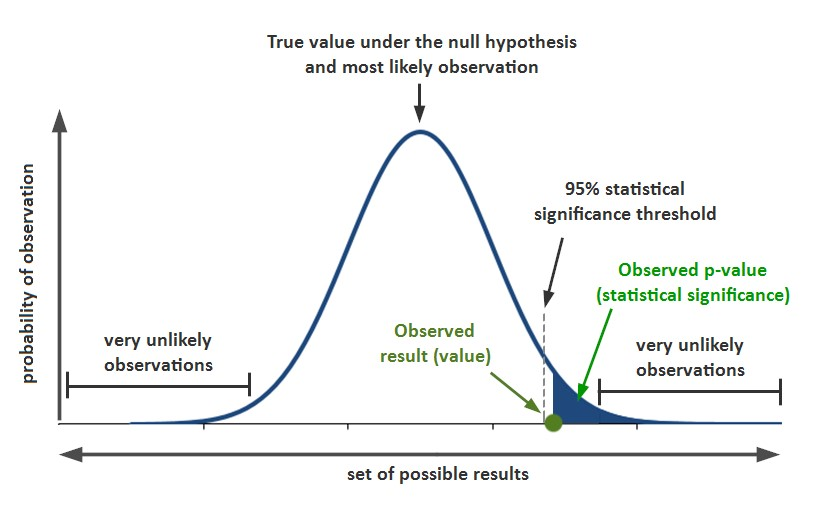

In [3]:
display.Image("./fig/p-value.jpg")

#### Answer

## Exercise 4:

Generate the plots that can search patterns on the behaviour of feature `charges` with respect to the other attributes: `bmi`, `children`, `smoker` and `region`. What patterns do you observe?

#### Answer

## Exercise 5:

Calculate and plot the correlation  matrix among `charges`, `bmi` and `children`. What can you conclude?

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to calculate the correlation matrix and [statsmodels.graphics.correlation.plot_corr](https://www.statsmodels.org/dev/generated/statsmodels.graphics.correlation.plot_corr.html) to plot the correlation matrix

Take into account that correlation is a measure of the linear relationship among the variables and that the absence of correlation does not mean that the two variables are unrelated. As can be seen on the next examples

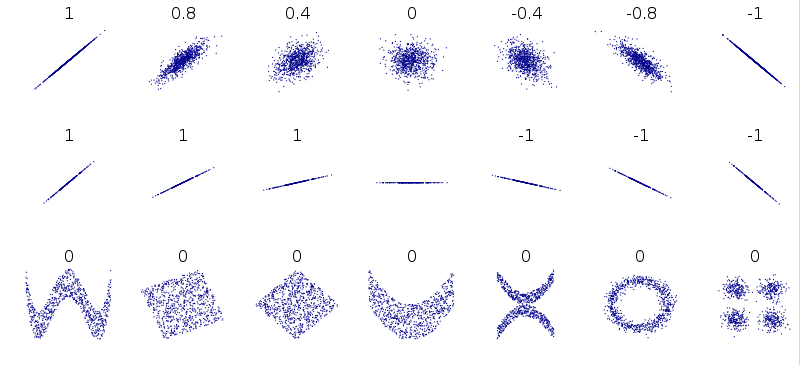

In [4]:
display.Image("./fig/correlation_examples.png")

#### Answer

## Simple Linear Regression

The simple linear regression is a noncomplex model for predicting a quantitative response $Y$ based on a single predictor variable $X$. The model assumes that there is a linear relationship between both of the variables. This relationship can be mathematically expressed as following: <center>$Y\approx\beta_0 + \beta_1X$</center>

where the "$\approx$" symbol can be read as "approximately modeled as". In the linear regression model the term $\beta_0$ is called the <b>intercept</b> and $\beta_1$ is called the <b>slope</b> of the model. Both of those terms together are called the <b>coefficients</b> or the <b>parameters</b> of the model. Once the model has been fitted using a training set, the estimated parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ can be used to make the estimation of the quantitative response $\hat{Y}$ based on the predictor variables $X$: <center>$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}X$</center>

where the hat symbol "  $\hat{}$  " denotes the estimated value of an unknown parameter or the predicted value of a response. Let us see an example of a simple linear regression with the examples that we saw on previous occassions: 



/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='charges', ylabel='bmi'>

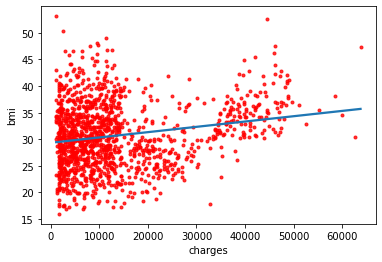

In [5]:
sns.regplot(insurance.charges,insurance.bmi, order=1, ci=None, scatter_kws={'color':'r', 's':9})

Now, let us see the estimates for the parameters in this regression:

In [6]:
est = smf.ols('charges ~ bmi', insurance).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           2.46e-13
Time:                        23:12:18   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Therefore, in this case, the estimated charge of the insurance, based on the measure of bmi it is calculated as: <center> $\hat{charge} = 393.873 * bmi$ </center>



Now, how are these parameters calculated? How do we asses how accurate these parameters are for expressing the relationship between the variables?

## Exercise 6:

Generate the prevous plot and linear regression for charge and children. What can be concluded about it?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>